In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale as std_scale, robust_scale

from scipy.signal import find_peaks, find_peaks_cwt, peak_widths


In [13]:
def load_data(root, scale='arith'):
    import os
    d = {}
    for fold in os.listdir(root):
        Xs = []
        Ys = []
        dYs = []
        for fname in os.listdir(f"{root}/{fold}"):
            if not fname.endswith(".txt"):
                continue
            with open(f"{root}/{fold}/{fname}", 'rt') as h:
                xs, ys = [], []
                dys = []
                for line in h.readlines():
                    line = line.strip()
                    line = line.split()
                    line = [float(val) for val in line]
                    x = line[0]
                    y = line[1:]
                    xs.append(x)
                    ys.append(y)
                xs = np.array(xs, 'd')
                ys = np.array(ys, 'd')
                # ym = np.median(ys, axis=1)
                ys_sorted = np.sort(ys, axis=1)
                ym = np.mean(ys_sorted[:,:27], axis=1)
                dys = np.median(np.abs(ys - ym[:,None]), axis=1)
                ys = ym
                if scale == 'arith':
                    ys -= ys.min()
                    ys_max = ys.max()
                    # ys /= 1000
                    # dys /= 1000
                    ys /= ys_max
                    dys /= ys_max
                elif scale == 'mult':
                    ys_min = ys.min()
                    ys /= ys_min
                    ys -= 1
                    # ys = np.log(ys)
                    dys /= ys_min
                elif scale == 'l1':
                    ys -= ys.min()
                    ys /= ys.sum()
                    ys *= 100
                elif scale == 'std':
                    ys = std_scale(ys)
                    ys_min = ys.min()
                    ys -= ys_min
                elif scale == 'robust':
                    ys = robust_scale(ys)
                    ys_min = ys.min()
                    ys -= ys_min
                Xs.append(xs)
                Ys.append(ys)
                dYs.append(dys)
        Xs, Ys =  np.array(Xs), np.array(Ys)
        Xs = Xs[:,40:]
        Ys = Ys[:,40:]
        
        if '191' in fold:
            d['191'] = (Xs, Ys, dYs)
        if '606' in fold:
            d['606'] = (Xs, Ys, dYs)
            
    return d

In [14]:
d = load_data("Table", scale='l1')

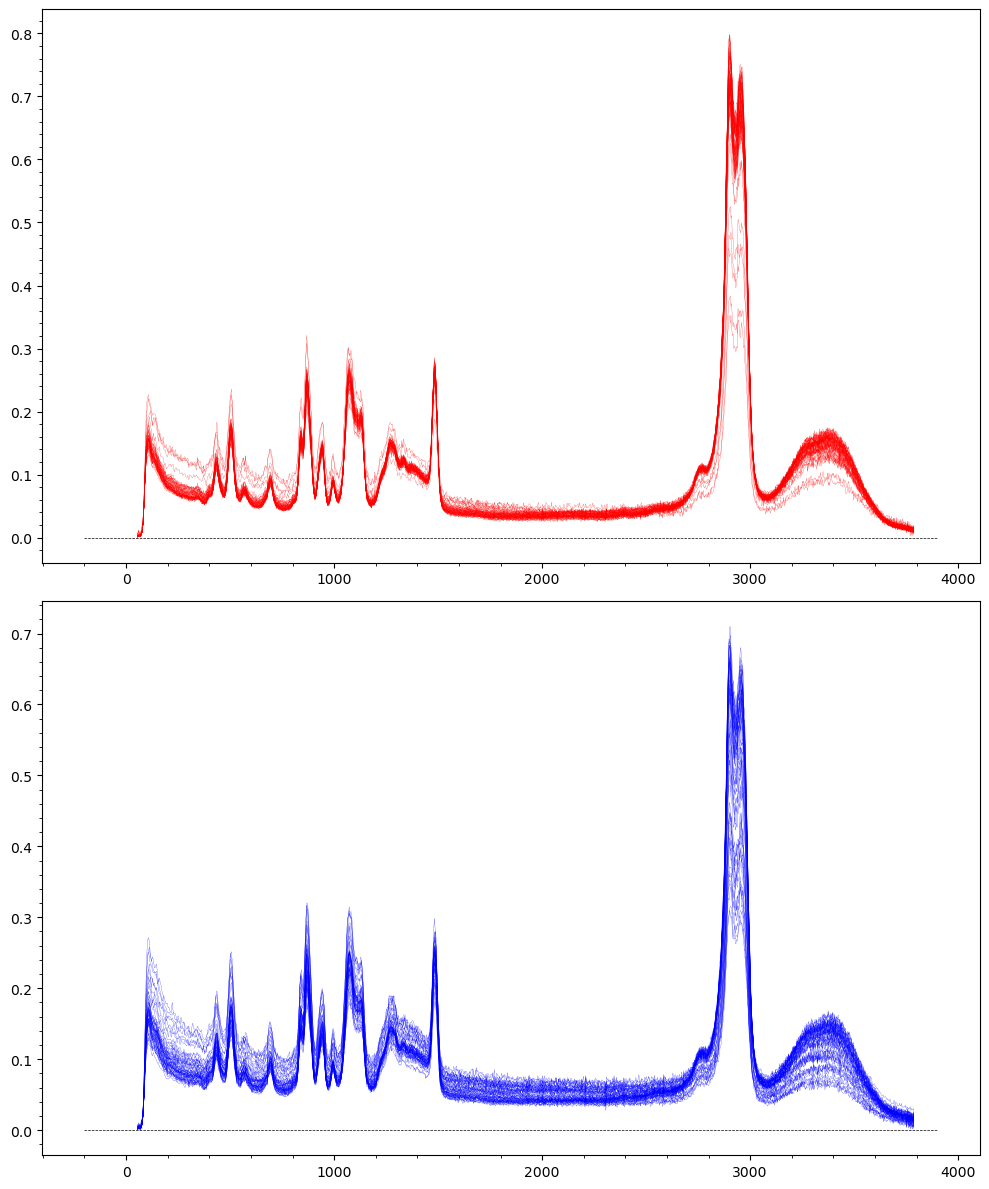

In [25]:
plt.figure(figsize=(10,12))
for i, key in enumerate(d):
    plt.subplot(2,1,i+1)
    Xs, Ys, _= d[key]
    if key == '191':
        color = 'b'
    if key == '606':
        color = 'r'
    
    for xs, ys in zip(Xs, Ys):
        plt.plot(xs, ys, color=color, linewidth=0.15)
        
        # inds, pops = find_peaks(ys, width=6, threshold=0.001)
        # plt.vlines(xs[inds], 0, 1, linewidth=0.15)
        
        # plt.scatter(xs[inds], ys[inds], s=9)
        # plt.plot(xs, ys, color=color, marker='o', markersize=4)
    # for xs in Xs:
    #     plt.vlines(xs, 0, 1, linestyles='dotted', colors='Gray')
    # plt.ylim(0,0.2)
    # plt.xlim(490,520)
    # plt.savefig("spectra.eps")
    plt.hlines(0, -200, 3900, linewidth=0.5, colors='k', linestyle='--')
    plt.minorticks_on()
plt.tight_layout()
plt.show()
# plt.figure(figsize=(10,12))
# for i, key in enumerate(d):
#     plt.subplot(2,1,i+1)
#     Xs, Ys, _= d[key]
#     Ys_t = Ys.T
#     if key == '191':
#         color = 'b'
#     if key == '606':
#         color = 'r'
#     for ys in Ys_t:
#         plt.plot(sorted(ys), color=color, linewidth=0.15)
#         # plt.plot(xs, ys, color=color, marker='o', markersize=4)
#     # for xs in Xs:
#     #     plt.vlines(xs, 0, 1, linestyles='dotted', colors='Gray')
#     # plt.ylim(0,0.3)
#     # plt.xlim(100,1200)
#     # plt.savefig("spectra.eps")
#     plt.minorticks_on()
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(10,12))
# for i, key in enumerate(d):
#     plt.subplot(2,1,i+1)
#     Xs, _, dYs = d[key]
#     if key == '191':
#         color = 'b'
#     if key == '606':
#         color = 'r'
#     for xs, dys in zip(Xs, dYs):
#         plt.plot(xs, dys, color=color)
#     # plt.ylim(0,0.3)
#     # plt.xlim(1450,1550)
# plt.tight_layout()
# plt.show()

In [ ]:
plt.figure(figsize=(12,8))
for i, key in enumerate(d):
    Xs, Ys, _ = d[key]
    if key == '191':
        color = 'b'
    if key == '606':
        color = 'r'
    xs = np.mean(Xs, axis=0)
    ys = np.mean(Ys, axis=0)
    plt.plot(xs, ys, color=color, linewidth=0.5, label=key)
    inds, pops = find_peaks(ys, )
    # print(peak_widths(xs, inds)[0])
    plt.vlines(xs[inds], 0, 1, linewidth=0.15)
    # plt.scatter(np.mean(Xs, axis=0), np.zeros(len(Ys[0])), c='k', s=9)
plt.legend()
Xs_606, Ys_606, _ = d['606']
Xs_191, Ys_191, _ = d['191']
# plt.plot(Xs_606[0], np.mean(Ys_606, axis=0)-np.mean(Ys_191, axis=0), label='diff')
xmin, xmax = plt.xlim()
plt.hlines(0,xmin,xmax, linestyle='--')
# plt.xlim(800,900)
# plt.ylim(-0.1,0.2)
plt.show()

In [16]:
from sklearn.decomposition import PCA

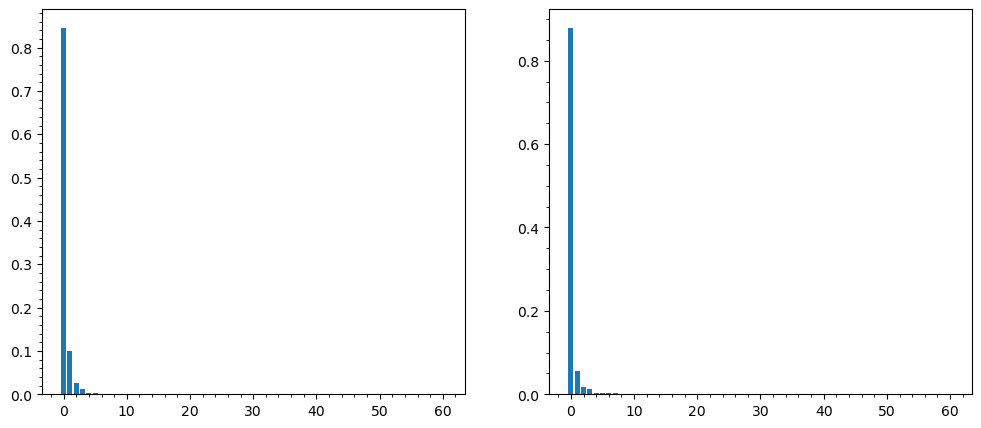

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
pca_191 = PCA()
X_191, Y_191, _ = d['191']
pca_191.fit(Y_191)
U_191 = pca_191.transform(Y_191)
plt.bar(range(len(pca_191.explained_variance_ratio_)), pca_191.explained_variance_ratio_)
plt.minorticks_on()
plt.subplot(1,2,2)
pca_606 = PCA()
X_606, Y_606, _ = d['606']
pca_606.fit(Y_606)
U_606 = pca_606.transform(Y_606)
plt.bar(range(len(pca_606.explained_variance_ratio_)), pca_606.explained_variance_ratio_)
plt.minorticks_on()
plt.show()

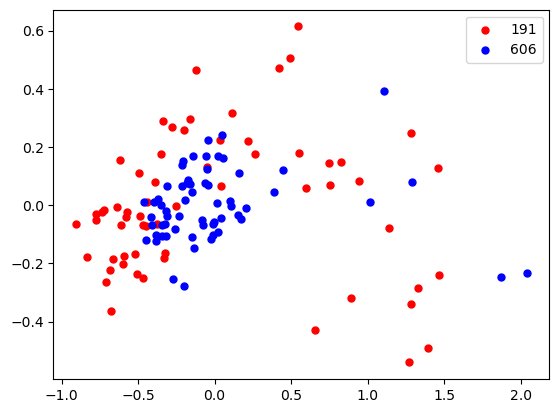

In [18]:
plt.scatter(U_191[:,0], U_191[:,1], c="r", s=25, label='191')
plt.scatter(U_606[:,0], U_606[:,1], c="b", s=25, label='606')
plt.legend()
# plt.savefig("spectra_pca.eps")
plt.show()

In [26]:
from mlgrad.pca.pca import find_robust_pc_all, find_rho_pc_all
from mlgrad.pca.location_scatter import robust_location, location
from mlgrad.funcs import Quantile_Sqrt, Sqrt, Power
from mlgrad.af import averaging_function

wm = averaging_function("WM", Quantile_Sqrt(0.5, eps=0.001))

606 [0.024 0.011]
191 [0.291 0.026]


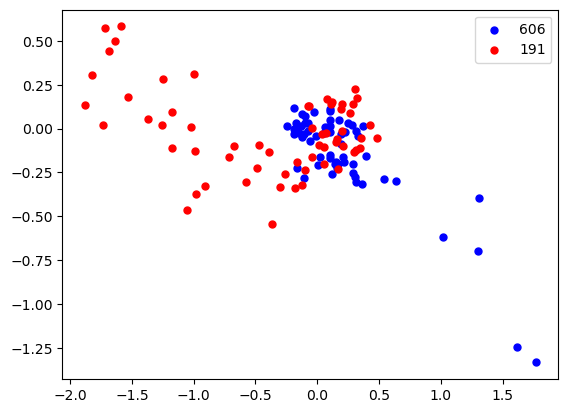

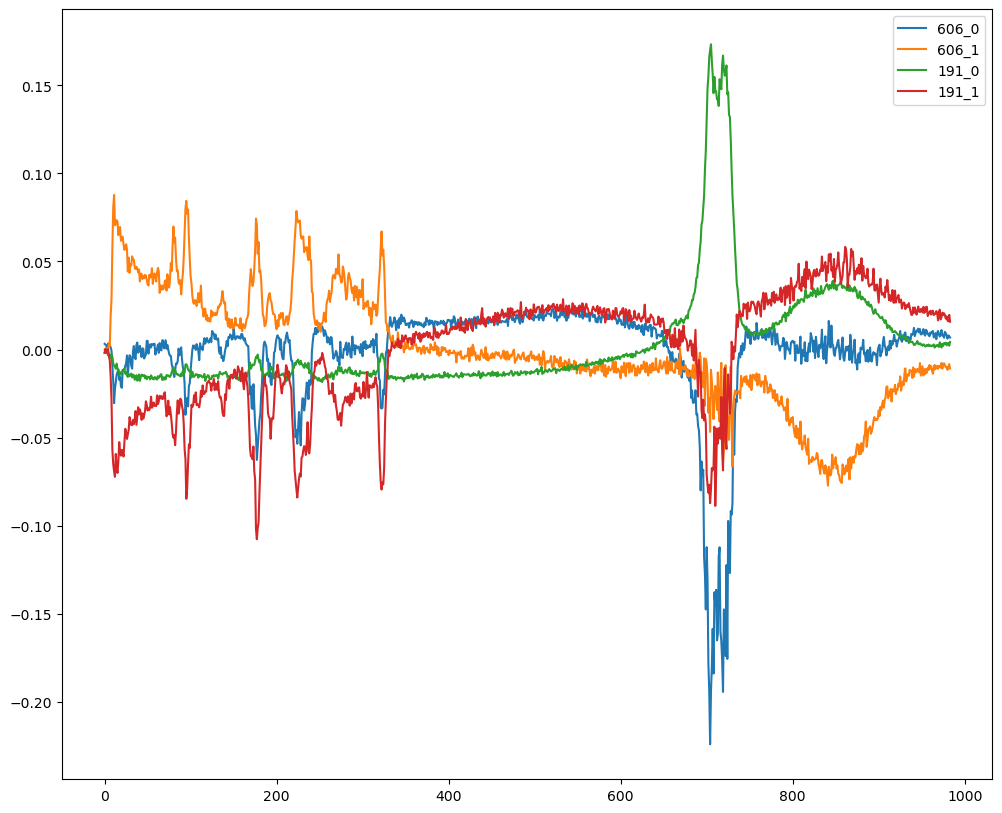

In [29]:
d1 = {}
for key,item in d.items():
    if key == "191":
        color='r'
    if key == "606":
        color='b'
    Xs, Ys, _ = item
    c = robust_location(Ys, wm)
    # c = location(Ys)
    # print(Ys.shape, c.shape)
    Ys1 = Ys - c[None,:]
    As, Ls, Us = find_robust_pc_all(Ys1, wm, 2, verbose=False)
    Is = np.argsort(Ls)
    As = [As[i] for i in Is]
    Us = [Us[i] for i in Is]
    print(key, Ls)
    d1[key] = (As, Ls, Us)
    Us0, Us1 = Us[-1], Us[-2]
    tmp = list(zip(Us0, Us1))
    tmp.sort()
    V1, V2 = zip(*tmp)
    V1, V2 = list(V1), list(V2)
    if V2[-1] - V2[0] > 0:
        Us1 = - Us1
    plt.scatter(Us0, Us1, label=key, c=color, s=25)
    # rgr = LinearRegression()
    # rgr.fit(Us0[:,None], Us1)
    # x_min, x_max = plt.xlim()
    # plt.plot([x_min, x_max], rgr.predict([[x_min], [x_max]]), color=color, linestyle='--')   
    # print(key, rgr.intercept_, rgr.coef_)
plt.legend()
# plt.savefig("spectra_robust_pca.eps")
plt.show()
plt.figure(figsize=(12,10))
for key,item in d.items():
    if key == "191":
        color='r'
    if key == "606":
        color='b'
    As, Ls, Us = d1[key]
    Us0, Us1 = Us[-1], Us[-2]
    As0, As1 = As[-1], As[-2]
    # tmp = list(zip(Us0, Us1))
    # tmp.sort()
    # V1, V2 = zip(*tmp)
    # V1, V2 = list(V1), list(V2)
    # if V2[-1] - V2[0] > 0:
    #     As1 = - As1
    plt.plot(As0, label=key+'_0')
    plt.plot(As1, label=key+'_1')
plt.legend()
# plt.ylim(-0.02,0.2)
plt.show()

606 [0.125 0.015]
191 [0.481 0.057]


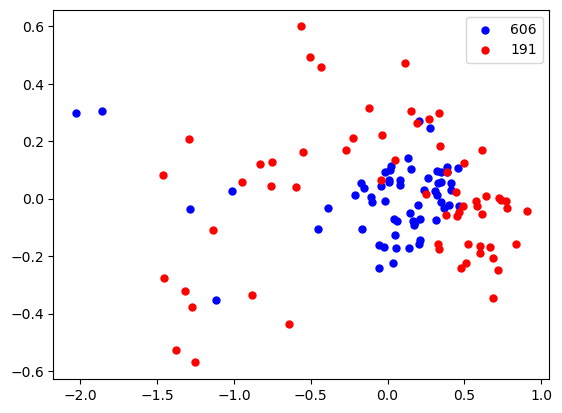

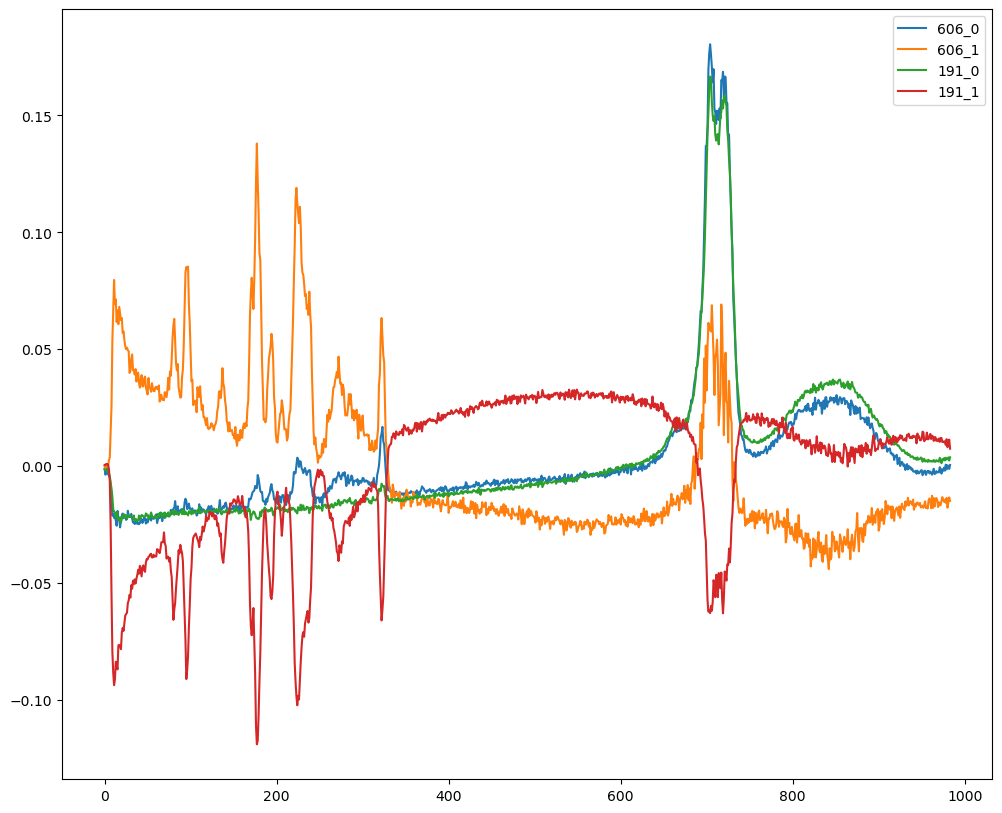

In [30]:
d1 = {}
for key,item in d.items():
    if key == "191":
        color='r'
    if key == "606":
        color='b'
    Xs, Ys, _ = item
    c = location(Ys)
    Ys1 = Ys - c
    As, Ls, Us = find_rho_pc_all(Ys1, Power(0.5), 2, verbose=False)
    Is = np.argsort(Ls)
    As = [As[i] for i in Is]
    Us = [Us[i] for i in Is]
    print(key, Ls)
    d1[key] = (As, Ls, Us)
    Us0, Us1 = Us[-1], Us[-2]
    tmp = list(zip(Us0, Us1))
    tmp.sort()
    V1, V2 = zip(*tmp)
    V1, V2 = list(V1), list(V2)
    if V2[-1] - V2[0] > 0:
        Us1 = - Us1
    plt.scatter(Us0, Us1, label=key, c=color, s=25)
    # rgr = LinearRegression()
    # rgr.fit(Us0[:,None], Us1)
    # x_min, x_max = plt.xlim()
    # plt.plot([x_min, x_max], rgr.predict([[x_min], [x_max]]), color=color, linestyle='--')   
    # print(key, rgr.intercept_, rgr.coef_)
plt.legend()
plt.show()
plt.figure(figsize=(12,10))
for key,item in d.items():
    if key == "191":
        color='r'
    if key == "606":
        color='b'
    As, Ls, Us = d1[key]
    Us0, Us1 = Us[-1], Us[-2]
    As0, As1 = As[-1], As[-2]
    tmp = list(zip(Us0, Us1))
    tmp.sort()
    V1, V2 = zip(*tmp)
    V1, V2 = list(V1), list(V2)
    if V2[-1] - V2[0] > 0:
        As1 = - As1
    plt.plot(As0, label=key+'_0')
    plt.plot(As1, label=key+'_1')
plt.legend()
# plt.ylim(-0.02,0.2)
plt.show()

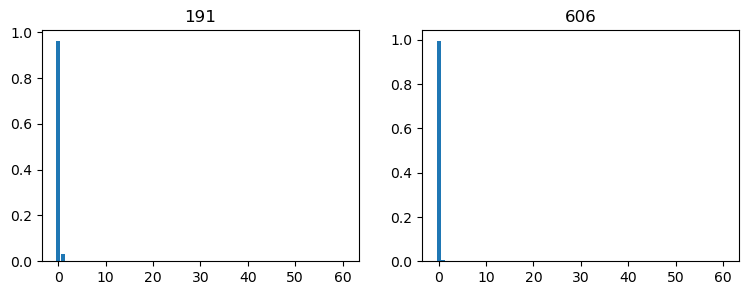

In [31]:
X_191, Y_191, _ = d['191']
X_606, Y_606, _ = d['606']
Y_191_t = np.ascontiguousarray(Y_191.T)
Y_606_t = np.ascontiguousarray(Y_606.T)
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.title('191')
pca_191_t = PCA()
pca_191_t.fit(Y_191_t)
U_191_t = pca_191_t.transform(Y_191_t)
plt.bar(range(len(pca_191_t.explained_variance_ratio_)), pca_191_t.explained_variance_ratio_)
plt.subplot(1,2,2)
plt.title('606')
pca_606_t = PCA()
pca_606_t.fit(Y_606_t)
U_606_t = pca_606_t.transform(Y_606_t)
plt.bar(range(len(pca_606_t.explained_variance_ratio_)), pca_606_t.explained_variance_ratio_)
plt.show()

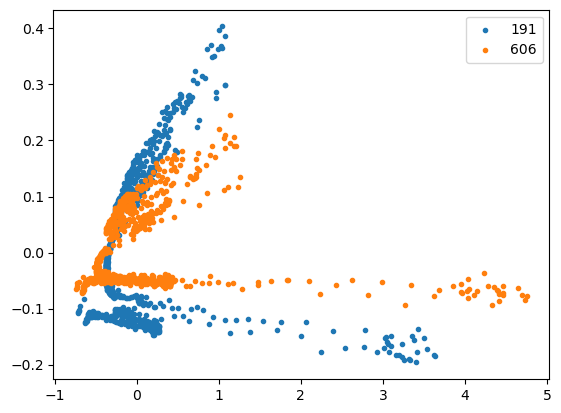

In [32]:
plt.scatter(U_191_t[:,0], U_191_t[:,1], s=9, label='191')
plt.scatter(U_606_t[:,0], U_606_t[:,1], s=9, label='606')
plt.legend()
plt.show()

191 [9.940e-01 2.224e-02 2.672e-03 8.820e-04 3.873e-04]
606 [1.308e+00 7.417e-03 7.034e-04 2.993e-04 2.279e-04]


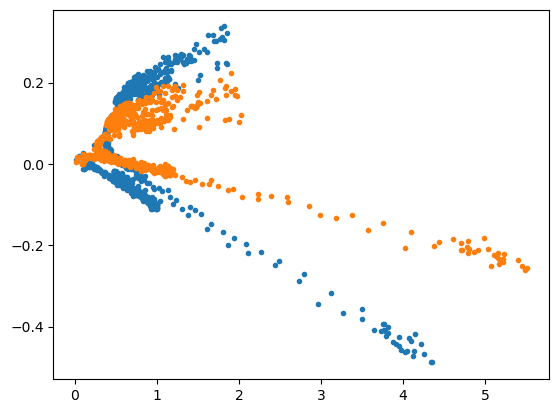

In [33]:
As_191_t, Ls_191_t, Us_191_t = find_rho_pc_all(Y_191_t, Power(1.0), 5, verbose=False)
As_606_t, Ls_606_t, Us_606_t = find_rho_pc_all(Y_606_t, Power(1.0), 5, verbose=False)
print("191", Ls_191_t)
print("606", Ls_606_t)
plt.scatter(Us_191_t[0], Us_191_t[1], s=9, label="191")
plt.scatter(Us_606_t[0], Us_606_t[1], s=9, label="606")
plt.show()

191 [0.315 0.003]
606 [0.246 0.002]


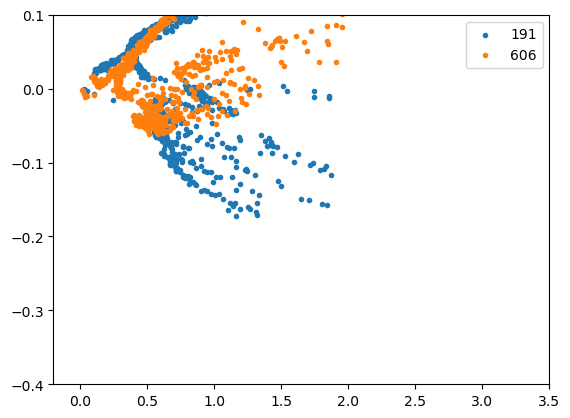

In [34]:
As_191_t, Ls_191_t, Us_191_t = find_robust_pc_all(Y_191_t, wm, 2, verbose=False)
As_606_t, Ls_606_t, Us_606_t = find_robust_pc_all(Y_606_t, wm, 2, verbose=False)
print("191", Ls_191_t)
print("606", Ls_606_t)
plt.scatter(Us_191_t[0], Us_191_t[1], s=9, label="191")
plt.scatter(Us_606_t[0], Us_606_t[1], s=9, label="606")
plt.legend()
plt.xlim(-0.2,3.5)
plt.ylim(-0.4,0.1)
plt.show()